# Weaher data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates 

pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 1000)

In [2]:
weather_data = pd.read_csv("data/concatenated.csv")

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (1,2,3,4,6,7,8,9,11,12,13,14,15,16,17,18,19,21,22,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(weather_data['Name'].unique())

402

## Exploratory Data Analysis

In [4]:
print(weather_data.shape)
weather_data.head(3)

(613670, 28)


,Name,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Solar Radiation (W/m^2),Dew Point (degF),Relative Humidity (%),ID,Precipitation Cover (%),Longitude,Info,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Solar Energy (J/m^2),Heat Index (degF),Weather Type,Snow Depth (in),Sea Level Pressure (mb),Snow (in),Name.1,Wind Gust (mph),Conditions,Wind Chill (degF)
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Akron, OH, United States",180.46,41.08431,10.3,23.2,1/1/2017,0.0,NaN,23.3,66.47,'Akron OH',0.0,-81.51431,NaN,33.7,42.2,9.5,10.5,NaN,NaN,Mist,0.41,1020.8,0.0,"Akron, OH, United States",NaN,Clear,21.1
2,"Akron, OH, United States",84.79,41.08431,82.1,33.0,1/2/2017,0.0,NaN,37.6,85.22,'Akron OH',16.67,-81.51431,NaN,41.8,47.8,3.4,7.3,NaN,NaN,"Mist, Light Drizzle, Rain, Fog, Light Rain",0.0,1020.3,0.0,"Akron, OH, United States",NaN,Overcast,26.5


In [5]:
# split Name feature
location = weather_data["Name"].apply(lambda x: x.split(", "))
city = location.apply(lambda x: x[0])
state = location.apply(lambda x: ''.join(x[1:2]))
country = location.apply(lambda x: x[-1])
result = pd.DataFrame(zip(city, state, country), columns=["City", "State", "Country"])
print(len(result['City'].unique()))
result

378


,City,State,Country
0,,,
1,Akron,OH,United States
2,Akron,OH,United States
3,Akron,OH,United States
4,Akron,OH,United States
...,...,...,...
613665,Yuma,AZ,United States
613666,Yuma,AZ,United States
613667,Yuma,AZ,United States
613668,Yuma,AZ,United States


In [6]:
# Concat split feature with the rest of the data

df = pd.concat([result, weather_data], axis=1, join="inner")
df.drop(columns=["Name"], inplace=True)

In [7]:
len(df['City'].unique())

378

In [8]:
df.head()

,City,State,Country,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Solar Radiation (W/m^2),Dew Point (degF),Relative Humidity (%),ID,Precipitation Cover (%),Longitude,Info,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Solar Energy (J/m^2),Heat Index (degF),Weather Type,Snow Depth (in),Sea Level Pressure (mb),Snow (in),Name.1,Wind Gust (mph),Conditions,Wind Chill (degF)
0,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akron,OH,United States,180.46,41.08431,10.3,23.2,1/1/2017,0.0,NaN,23.3,66.47,'Akron OH',0.0,-81.51431,NaN,33.7,42.2,9.5,10.5,NaN,NaN,Mist,0.41,1020.8,0.0,"Akron, OH, United States",NaN,Clear,21.1
2,Akron,OH,United States,84.79,41.08431,82.1,33.0,1/2/2017,0.0,NaN,37.6,85.22,'Akron OH',16.67,-81.51431,NaN,41.8,47.8,3.4,7.3,NaN,NaN,"Mist, Light Drizzle, Rain, Fog, Light Rain",0.0,1020.3,0.0,"Akron, OH, United States",NaN,Overcast,26.5
3,Akron,OH,United States,179.42,41.08431,90.3,42.0,1/3/2017,0.37,NaN,43.6,90.06,'Akron OH',66.67,-81.51431,NaN,46.3,48.8,5.0,13.1,NaN,NaN,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,1005.3,0.0,"Akron, OH, United States",29.8,"Rain, Overcast",35.0
4,Akron,OH,United States,275.25,41.08431,95.8,20.8,1/4/2017,0.02,NaN,20.8,68.33,'Akron OH',20.83,-81.51431,NaN,30.2,43.0,8.6,31.5,NaN,NaN,"Mist, Light Snow, Light Rain",0.0,1008.3,0.0,"Akron, OH, United States",39.6,"Rain, Overcast",5.1


In [9]:
df['State'].value_counts()

CA                 61443
FL                 50689
TX                 43012
MI                 24579
NC                 24577
WA                 23044
OH                 21507
PA                 18434
WI                 18434
NY                 18433
AZ                 16906
IN                 16897
IL                 16897
LA                 15363
SC                 15360
VA                 13825
CO                 12290
OR                 12290
TN                 12289
CT                 12289
IA                 12288
NJ                 10754
AR                 10752
KY                  7682
MS                  7681
MA                  7681
OK                  7680
MN                  7680
UT                  7680
ME                  6146
NM                  6145
MD                  6145
NV                  6144
ID                  6144
MO                  6144
AK                  4609
MT                  4609
WY                  4608
SD                  4608
VT                  4608


In [10]:
df['City'].value_counts()

Springfield           6144
Albany                4611
Warren                4608
Ashland               3074
Salinas               3073
Santa Rosa            3073
Wilmington            3072
Fayetteville          3072
Lewiston              3072
Washington            3072
Columbus              3072
Longview              3072
Portland              3072
Columbia              3072
Rochester             3072
Jackson               3072
Greenville            3072
Lafayette             3072
Conway                3072
Long Beach            2266
Amarillo              1537
Anderson              1537
Billings              1537
Anacortes             1537
Ann Arbor             1537
Bossier City          1537
Yuma                  1537
Boulder               1537
Benton Harbor         1537
Auburn                1537
Bakersfield           1537
Tucson                1537
Austin                1537
Bridgeton             1537
Biloxi                1537
Flagstaff             1537
Honolulu              1537
B

In [11]:
df['Country'].value_counts()

United States    609853
Uruguay            3804
Name                 12
                     1
Name: Country, dtype: int64

In [12]:
print(df.shape)
df.columns

(613670, 30)


Index(['City', 'State', 'Country', 'Wind Direction', 'Latitude',
       'Cloud Cover (%)', 'Minimum Temperature (degF)', 'Date time',
       'Precipitation (in)', 'Solar Radiation (W/m^2)', 'Dew Point (degF)',
       'Relative Humidity (%)', 'ID', 'Precipitation Cover (%)', 'Longitude',
       'Info', 'Temperature (degF)', 'Maximum Temperature (degF)',
       'Visibility (mi)', 'Wind Speed (mph)', 'Solar Energy (J/m^2)',
       'Heat Index (degF)', 'Weather Type', 'Snow Depth (in)',
       'Sea Level Pressure (mb)', 'Snow (in)', 'Name.1', 'Wind Gust (mph)',
       'Conditions', 'Wind Chill (degF)'],
      dtype='object')

In [13]:
df.dtypes

City                          object
State                         object
Country                       object
Wind Direction                object
Latitude                      object
Cloud Cover (%)               object
Minimum Temperature (degF)    object
Date time                     object
Precipitation (in)            object
Solar Radiation (W/m^2)       object
Dew Point (degF)              object
Relative Humidity (%)         object
ID                            object
Precipitation Cover (%)       object
Longitude                     object
Info                          object
Temperature (degF)            object
Maximum Temperature (degF)    object
Visibility (mi)               object
Wind Speed (mph)              object
Solar Energy (J/m^2)          object
Heat Index (degF)             object
Weather Type                  object
Snow Depth (in)               object
Sea Level Pressure (mb)       object
Snow (in)                     object
Name.1                        object
W

### Cleaning Data

In [14]:
# remove wrong country info
df = df[~(df['Country'] == 'Uruguay') & ~(df['Country'] == 'Name')]

In [15]:
df['Country'].value_counts()

United States    609853
                     1
Name: Country, dtype: int64

In [16]:
df["City"].value_counts()

Springfield           6144
Albany                4611
Warren                4608
Ashland               3074
Washington            3072
Longview              3072
Jackson               3072
Greenville            3072
Lewiston              3072
Portland              3072
Fayetteville          3072
Columbus              3072
Columbia              3072
Conway                3072
Lafayette             3072
Wilmington            3072
Rochester             3072
Bakersfield           1537
Asheville             1537
Arroyo Grande         1537
Austin                1537
Bridgeton             1537
Akron                 1537
Auburn                1537
Bristol               1537
Bellevue              1537
Tucson                1537
Bloomington           1537
Benton Harbor         1537
Anderson              1537
Bend                  1537
Allentown             1537
Alexandria            1537
Bay City              1537
Boulder               1537
Prescott              1537
Billings              1537
P

In [17]:
# because of concatenating data 
df[df["City"] == 'Name']

,City,State,Country,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Solar Radiation (W/m^2),Dew Point (degF),Relative Humidity (%),ID,Precipitation Cover (%),Longitude,Info,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Solar Energy (J/m^2),Heat Index (degF),Weather Type,Snow Depth (in),Sea Level Pressure (mb),Snow (in),Name.1,Wind Gust (mph),Conditions,Wind Chill (degF)


In [18]:
df[df['City'] == '']

,City,State,Country,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Solar Radiation (W/m^2),Dew Point (degF),Relative Humidity (%),ID,Precipitation Cover (%),Longitude,Info,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Solar Energy (J/m^2),Heat Index (degF),Weather Type,Snow Depth (in),Sea Level Pressure (mb),Snow (in),Name.1,Wind Gust (mph),Conditions,Wind Chill (degF)
0,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = df[~(df["City"] == 'Name') & ~(df['City'] == '')]

In [20]:
df['City'].value_counts()

Springfield           6144
Albany                4611
Warren                4608
Ashland               3074
Washington            3072
Longview              3072
Jackson               3072
Greenville            3072
Lewiston              3072
Portland              3072
Fayetteville          3072
Columbus              3072
Columbia              3072
Conway                3072
Lafayette             3072
Wilmington            3072
Rochester             3072
Bakersfield           1537
Asheville             1537
Arroyo Grande         1537
Austin                1537
Bridgeton             1537
Akron                 1537
Auburn                1537
Bristol               1537
Bellevue              1537
Tucson                1537
Bloomington           1537
Benton Harbor         1537
Anderson              1537
Bend                  1537
Allentown             1537
Alexandria            1537
Bay City              1537
Boulder               1537
Prescott              1537
Billings              1537
P

In [21]:
df.isnull().sum()

City                               0
State                              0
Country                            0
Wind Direction                     1
Latitude                           0
Cloud Cover (%)                    1
Minimum Temperature (degF)         1
Date time                          0
Precipitation (in)                 0
Solar Radiation (W/m^2)       350006
Dew Point (degF)                   1
Relative Humidity (%)              1
ID                             40350
Precipitation Cover (%)            1
Longitude                          0
Info                          609853
Temperature (degF)                 1
Maximum Temperature (degF)         1
Visibility (mi)                    4
Wind Speed (mph)                   1
Solar Energy (J/m^2)          350006
Heat Index (degF)             417127
Weather Type                  214363
Snow Depth (in)                    1
Sea Level Pressure (mb)         3332
Snow (in)                          1
Name.1                             0
W

In [22]:
# check for nan values where nan is 1
df[df['Wind Direction'].isna()]

,City,State,Country,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Solar Radiation (W/m^2),Dew Point (degF),Relative Humidity (%),ID,Precipitation Cover (%),Longitude,Info,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Solar Energy (J/m^2),Heat Index (degF),Weather Type,Snow Depth (in),Sea Level Pressure (mb),Snow (in),Name.1,Wind Gust (mph),Conditions,Wind Chill (degF)
150554,Douglas,AZ,United States,NaN,31.3445,NaN,NaN,2/20/2021,0.0,NaN,NaN,NaN,Douglas\tAZ,NaN,-109.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Douglas, AZ, United States",NaN,NaN,NaN


In [23]:
# remove almost empty row
df = df[~df['Wind Direction'].isna()]

In [24]:
# missing values
df.isnull().sum()

City                               0
State                              0
Country                            0
Wind Direction                     0
Latitude                           0
Cloud Cover (%)                    0
Minimum Temperature (degF)         0
Date time                          0
Precipitation (in)                 0
Solar Radiation (W/m^2)       350005
Dew Point (degF)                   0
Relative Humidity (%)              0
ID                             40350
Precipitation Cover (%)            0
Longitude                          0
Info                          609852
Temperature (degF)                 0
Maximum Temperature (degF)         0
Visibility (mi)                    3
Wind Speed (mph)                   0
Solar Energy (J/m^2)          350005
Heat Index (degF)             417126
Weather Type                  214362
Snow Depth (in)                    0
Sea Level Pressure (mb)         3331
Snow (in)                          0
Name.1                             0
W

In [25]:
# missing value percentage
df.isnull().mean() * 100

City                            0.000000
State                           0.000000
Country                         0.000000
Wind Direction                  0.000000
Latitude                        0.000000
Cloud Cover (%)                 0.000000
Minimum Temperature (degF)      0.000000
Date time                       0.000000
Precipitation (in)              0.000000
Solar Radiation (W/m^2)        57.391793
Dew Point (degF)                0.000000
Relative Humidity (%)           0.000000
ID                              6.616359
Precipitation Cover (%)         0.000000
Longitude                       0.000000
Info                          100.000000
Temperature (degF)              0.000000
Maximum Temperature (degF)      0.000000
Visibility (mi)                 0.000492
Wind Speed (mph)                0.000000
Solar Energy (J/m^2)           57.391793
Heat Index (degF)              68.397906
Weather Type                   35.149840
Snow Depth (in)                 0.000000
Sea Level Pressu

In [26]:
# columns to remove which have more than 50% of missing values and with high cardinality
columns_to_remove = ['Country', 'ID', 'Info', 'Heat Index (degF)', 'Wind Chill (degF)', 'Solar Radiation (W/m^2)', 'Solar Energy (J/m^2)', 'Name.1']
data = df.drop(columns=columns_to_remove)

In [27]:
numeric_features = ['Wind Direction', 'Latitude',
       'Cloud Cover (%)', 'Minimum Temperature (degF)',
       'Precipitation (in)', 'Dew Point (degF)',
       'Relative Humidity (%)', 'Precipitation Cover (%)', 'Longitude',
       'Temperature (degF)', 'Maximum Temperature (degF)',
       'Visibility (mi)', 'Wind Speed (mph)',
       'Snow Depth (in)', 'Sea Level Pressure (mb)', 'Snow (in)', 'Wind Gust (mph)']

In [28]:
# convert all strings to numbers 
data[numeric_features] = data[numeric_features].astype(float)

In [29]:
# convert string to datetime
data['Date time'] =  pd.to_datetime(data['Date time'], infer_datetime_format=True)

In [30]:
data.dtypes

City                                  object
State                                 object
Wind Direction                       float64
Latitude                             float64
Cloud Cover (%)                      float64
Minimum Temperature (degF)           float64
Date time                     datetime64[ns]
Precipitation (in)                   float64
Dew Point (degF)                     float64
Relative Humidity (%)                float64
Precipitation Cover (%)              float64
Longitude                            float64
Temperature (degF)                   float64
Maximum Temperature (degF)           float64
Visibility (mi)                      float64
Wind Speed (mph)                     float64
Weather Type                          object
Snow Depth (in)                      float64
Sea Level Pressure (mb)              float64
Snow (in)                            float64
Wind Gust (mph)                      float64
Conditions                            object
dtype: obj

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609852 entries, 1 to 613669
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   City                        609852 non-null  object
 1   State                       609852 non-null  object
 2   Country                     609852 non-null  object
 3   Wind Direction              609852 non-null  object
 4   Latitude                    609852 non-null  object
 5   Cloud Cover (%)             609852 non-null  object
 6   Minimum Temperature (degF)  609852 non-null  object
 7   Date time                   609852 non-null  object
 8   Precipitation (in)          609852 non-null  object
 9   Solar Radiation (W/m^2)     259847 non-null  object
 10  Dew Point (degF)            609852 non-null  object
 11  Relative Humidity (%)       609852 non-null  object
 12  ID                          569502 non-null  object
 13  Precipitation Cover (%)     6

In [32]:
data.describe()

,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Precipitation (in),Dew Point (degF),Relative Humidity (%),Precipitation Cover (%),Longitude,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Snow Depth (in),Sea Level Pressure (mb),Snow (in),Wind Gust (mph)
count,609852.000000,609852.000000,609852.000000,609852.000000,609852.000000,609852.000000,609852.000000,609852.000000,609852.000000,609852.000000,609852.000000,609849.000000,609852.000000,609852.000000,606521.000000,609852.000000,430914.000000
mean,181.516585,37.922511,39.802312,48.372284,0.109192,45.103467,68.069119,10.216313,-93.950982,57.427109,66.996064,9.280348,13.980637,0.800962,1016.837796,0.095250,26.611108
std,69.257121,5.829768,30.171840,18.279936,0.349002,18.722722,16.630387,18.379065,16.690148,18.485326,19.879790,2.761878,5.482532,4.786049,6.645085,0.953921,8.153991
min,0.000000,21.304900,0.000000,-49.000000,0.000000,-54.400000,3.830000,0.000000,-157.858000,-45.900000,-43.000000,0.000000,0.000000,0.000000,967.700000,0.000000,0.000000
25%,131.170000,34.053600,12.300000,34.900000,0.000000,31.000000,59.050000,0.000000,-106.328000,43.900000,52.900000,9.000000,10.100000,0.000000,1012.700000,0.000000,20.800000
50%,181.540000,38.577500,36.600000,49.800000,0.000000,46.200000,70.770000,0.000000,-88.952100,59.600000,70.100000,9.800000,13.200000,0.000000,1016.500000,0.000000,25.300000
75%,233.250000,42.101200,64.000000,63.000000,0.040000,60.600000,79.910000,12.500000,-81.045370,72.600000,83.000000,9.900000,17.100000,0.000000,1020.800000,0.000000,31.100000
max,357.920000,64.845300,100.000000,98.100000,30.080000,82.000000,100.000000,100.000000,-68.770770,108.100000,121.600000,627.400000,134.400000,133.070000,1054.600000,116.930000,340.900000


In [33]:
data.describe(exclude='number')

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,City,State,Date time,Weather Type,Conditions
count,609852,609852,609852,395490,609852
unique,376,49,1537,5834,9
top,Springfield,CA,2020-02-04 00:00:00,Mist,Clear
freq,6144,61443,397,41077,206914
first,NaN,NaN,2017-01-01 00:00:00,NaN,NaN
last,NaN,NaN,2021-03-17 00:00:00,NaN,NaN


In [34]:
# check total feature types in data 
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("Total Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Total Numerical Features Count 18
Discrete feature Count 0
Continuous feature Count 18
Categorical feature Count 4


C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


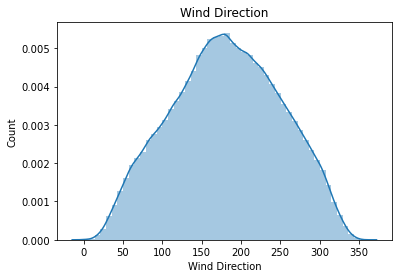

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


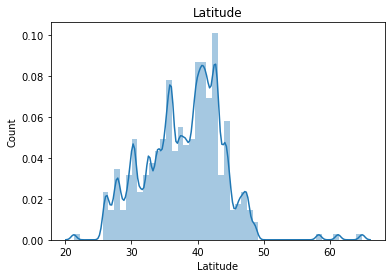

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


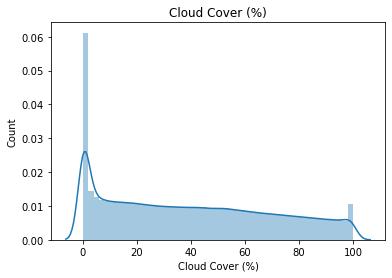

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


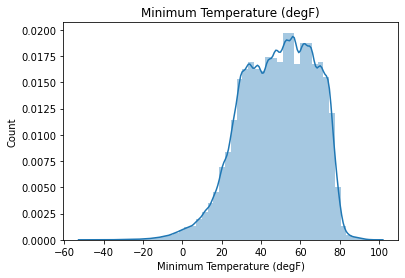

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


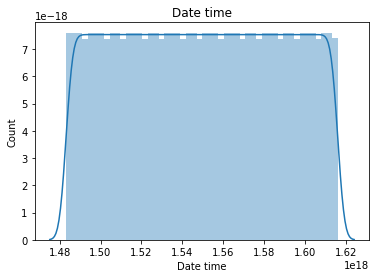

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


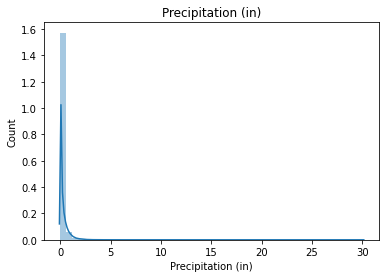

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


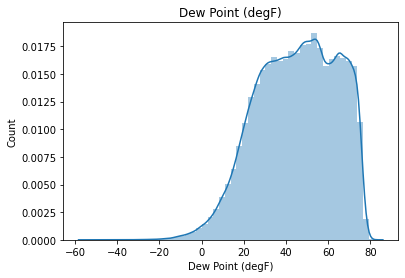

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


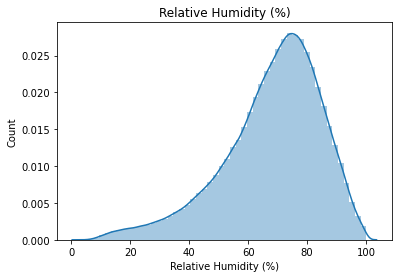

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


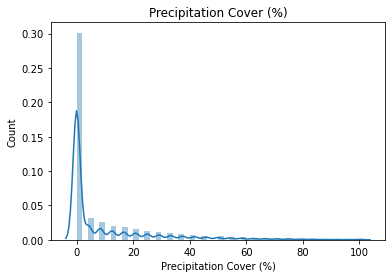

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


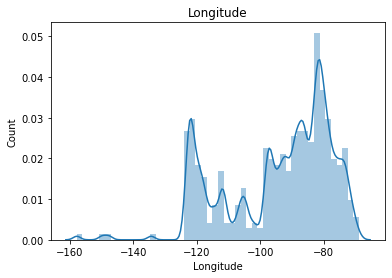

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


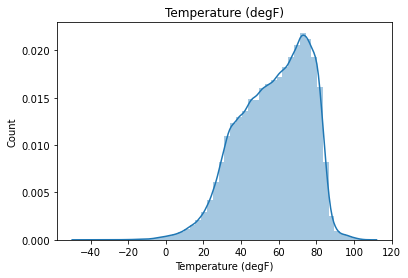

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


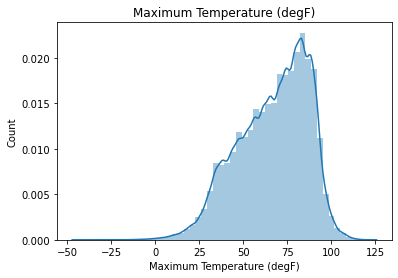

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


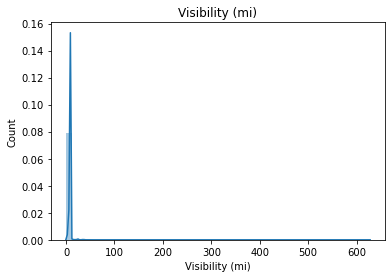

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


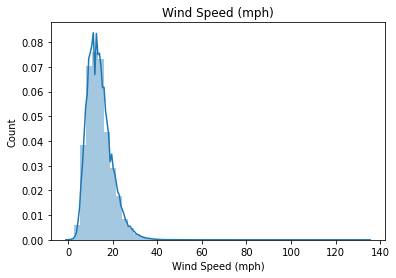

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


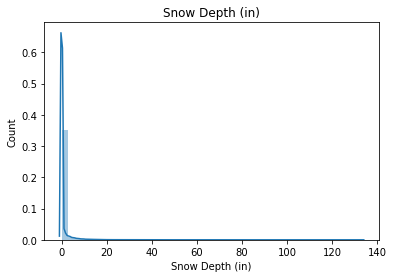

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


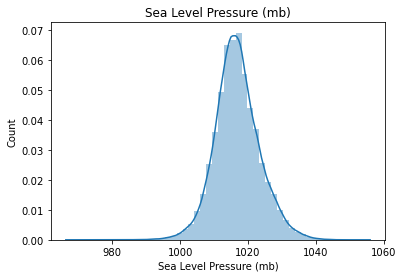

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


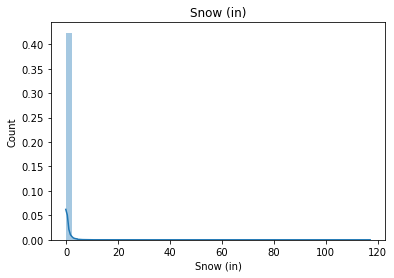

<Figure size 1080x1080 with 0 Axes>

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


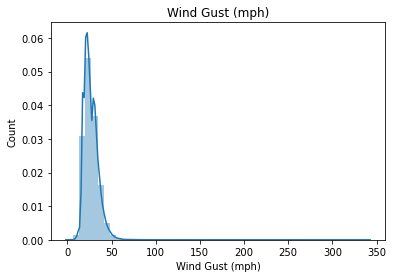

<Figure size 1080x1080 with 0 Axes>

In [35]:
for feature in continuous_feature:
    data=data.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [36]:
data['Conditions'].value_counts()

Clear                     206914
Partially cloudy          145839
Rain, Partially cloudy    108095
Rain, Overcast             58076
Overcast                   25491
Rain                       23756
Snow, Partially cloudy     18739
Snow, Overcast             17635
Snow                        5307
Name: Conditions, dtype: int64

In [37]:
data['Weather Type'].value_counts()

Mist                                                                                                   41077
Light Rain                                                                                             33363
Mist, Fog                                                                                              25241
Mist, Light Rain                                                                                       20622
Smoke Or Haze                                                                                          19514
                                                                                                       ...  
Ice, Drizzle, Mist, Light Snow, Rain, Fog, Heavy Rain, Light Rain, Snow                                    1
Ice, Mist, Light Snow, Rain, Heavy Rain And Snow, Light Rain And Snow, Heavy Rain, Light Rain, Snow        1
Drizzle, Light Snow, Mist, Heavy Drizzle, Light Drizzle, Fog, Light Rain                                   1
Drizzle, Mist, Ligh

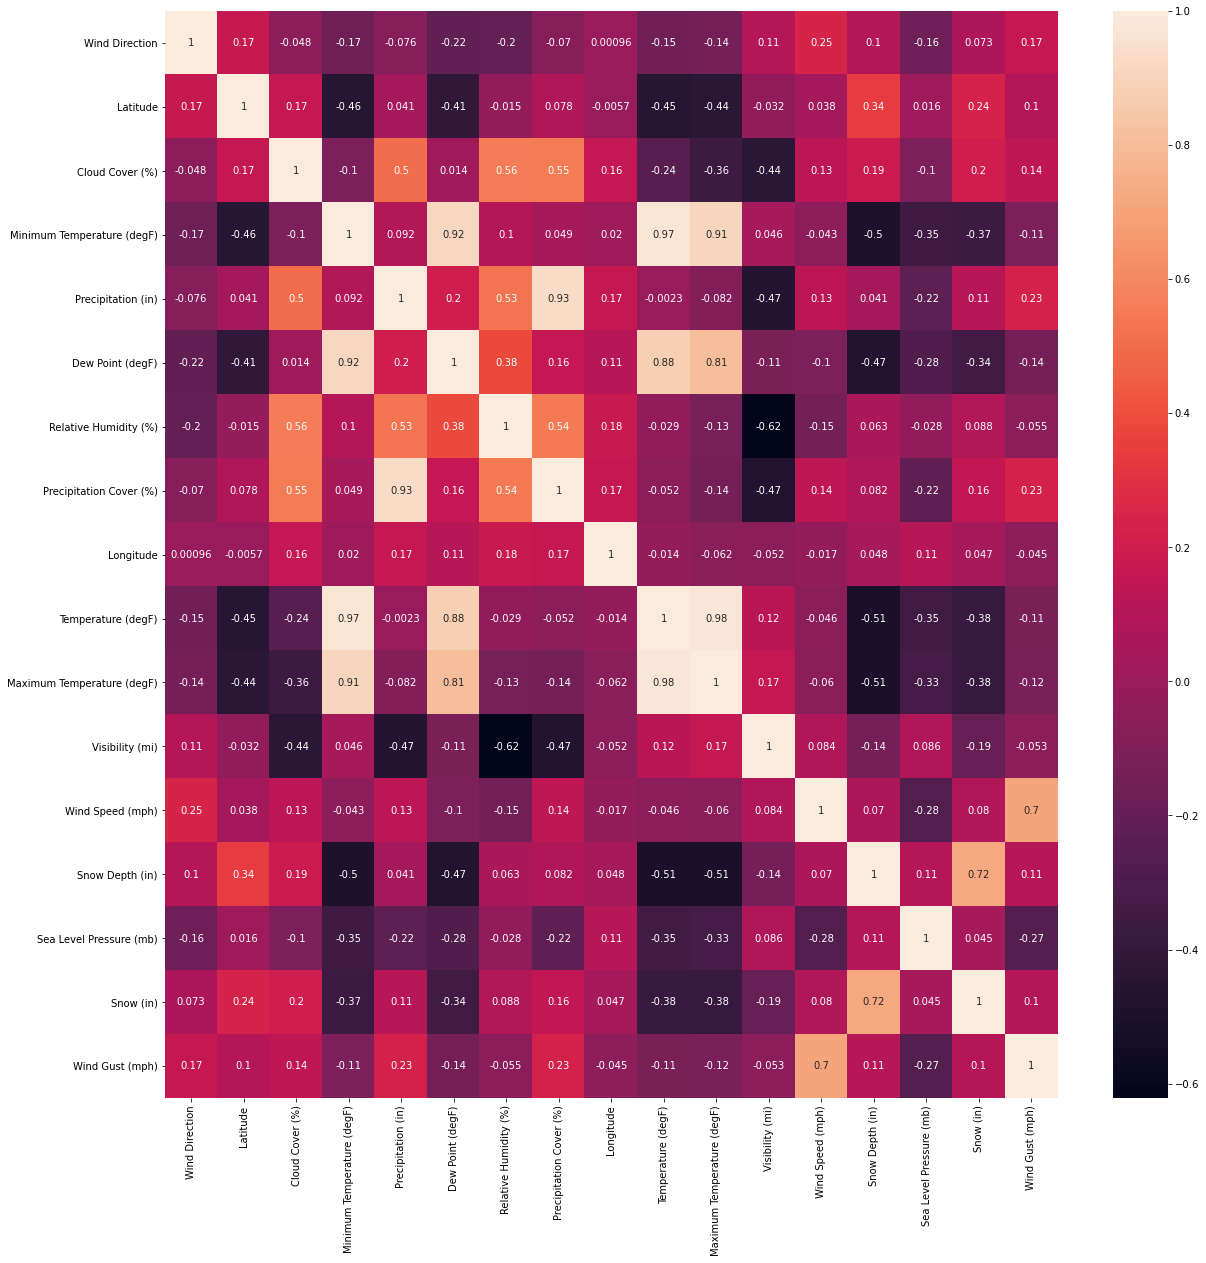

In [38]:
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Clear'),
  Text(1, 0, 'Overcast'),
  Text(2, 0, 'Rain, Overcast'),
  Text(3, 0, 'Snow, Partially cloudy'),
  Text(4, 0, 'Snow'),
  Text(5, 0, 'Partially cloudy'),
  Text(6, 0, 'Snow, Overcast'),
  Text(7, 0, 'Rain, Partially cloudy'),
  Text(8, 0, 'Rain')])

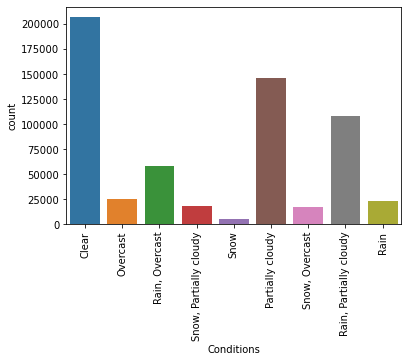

In [39]:
# 
sns.countplot(data["Conditions"])
plt.xticks(rotation=90)

## Exploring and Handling missing values

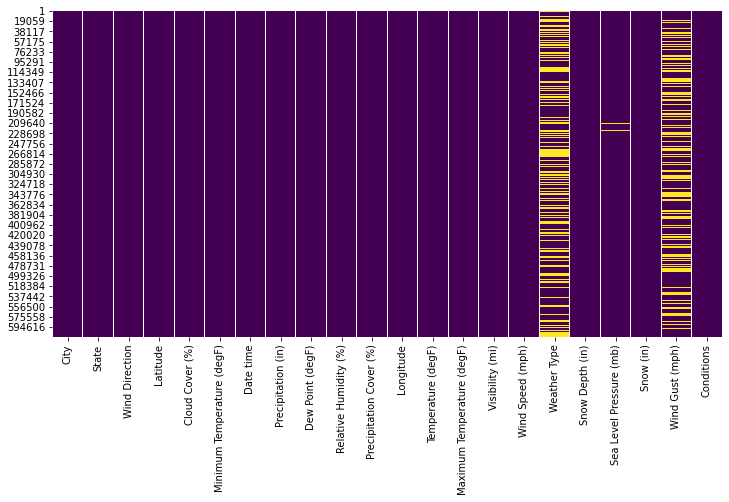

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

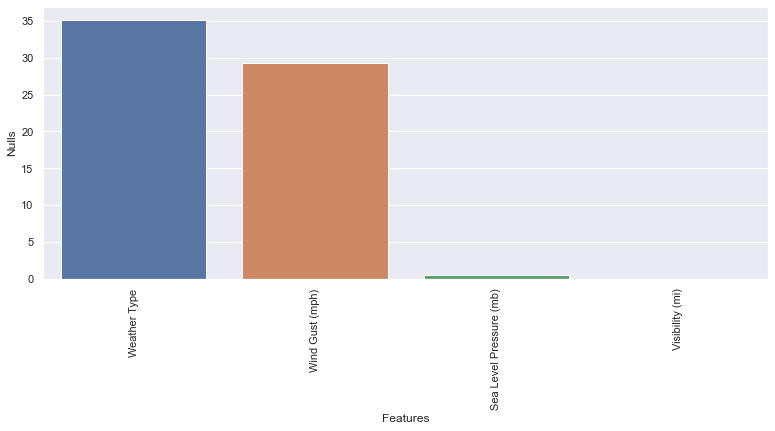

In [41]:
#missing value counts in each of these columns
Isnull = data.isnull().sum()/len(data)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull
Isnull = Isnull.to_frame()
Isnull.columns = ['Nulls']
Isnull.index.names = ['Features']
Isnull['Features'] = Isnull.index

#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='darkgrid',color_codes=True,)
sns.barplot(x='Features', y='Nulls', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

## Handling Visibility feature

In [42]:
data[data['Visibility (mi)'].isna()]

,City,State,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Dew Point (degF),Relative Humidity (%),Precipitation Cover (%),Longitude,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Weather Type,Snow Depth (in),Sea Level Pressure (mb),Snow (in),Wind Gust (mph),Conditions
167163,Elko,NV,79.44,40.8357,0.0,34.1,2020-05-09,0.0,16.4,23.28,0.0,-115.768,59.2,78.2,NaN,9.2,NaN,0.0,1016.6,0.0,NaN,Clear
167164,Elko,NV,174.55,40.8357,1.1,39.8,2020-05-10,0.0,21.5,23.56,0.0,-115.768,64.9,83.9,NaN,15.0,NaN,0.0,1010.2,0.0,20.8,Clear
540881,Taos,NM,139.09,36.4120,0.0,69.2,2019-07-31,0.0,46.9,34.02,0.0,-105.574,77.9,88.1,NaN,23.0,Lightning Without Thunder,0.0,1019.1,0.0,35.6,Clear


In [43]:
data['Visibility (mi)'][167160:167170]

167162    9.9
167163    NaN
167164    NaN
167165    9.9
167166    9.9
167167    9.9
167168    9.9
167169    9.9
167170    9.9
167171    9.9
Name: Visibility (mi), dtype: float64

In [44]:
print("Mean", data['Visibility (mi)'].mean())
print("Median",data['Visibility (mi)'].median())
print("Mode", data['Visibility (mi)'].mode())

Mean 9.280348414115627
Median 9.8
Mode 0    9.9
dtype: float64


### Filling missing values for visibility

In [45]:
# fill missing values with mode for visibility
data['Visibility (mi)'] = data['Visibility (mi)'].fillna(data['Visibility (mi)'].mode()[0])

### Explore Wind Gust feature for missing values

In [46]:
data[data['Wind Gust (mph)'].isna()]

,City,State,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Dew Point (degF),Relative Humidity (%),Precipitation Cover (%),Longitude,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Weather Type,Snow Depth (in),Sea Level Pressure (mb),Snow (in),Wind Gust (mph),Conditions
1,Akron,OH,180.46,41.08431,10.3,23.2,2017-01-01,0.0,23.3,66.47,0.00,-81.51431,33.7,42.2,9.5,10.5,Mist,0.41,1020.8,0.0,NaN,Clear
2,Akron,OH,84.79,41.08431,82.1,33.0,2017-01-02,0.0,37.6,85.22,16.67,-81.51431,41.8,47.8,3.4,7.3,"Mist, Light Drizzle, Rain, Fog, Light Rain",0.00,1020.3,0.0,NaN,Overcast
13,Akron,OH,244.83,41.08431,60.6,25.1,2017-01-13,0.0,19.9,66.90,0.00,-81.51431,29.7,34.0,9.9,12.7,NaN,0.00,1036.9,0.0,NaN,Partially cloudy
14,Akron,OH,147.71,41.08431,78.7,25.9,2017-01-14,0.0,20.1,65.03,0.00,-81.51431,30.5,35.0,9.9,7.9,Light Snow,0.00,1032.0,0.0,NaN,Overcast
15,Akron,OH,143.00,41.08431,6.5,20.9,2017-01-15,0.0,21.0,75.33,0.00,-81.51431,28.1,36.6,7.2,7.8,"Mist, Smoke Or Haze",0.00,1029.8,0.0,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613657,Yuma,AZ,260.62,32.68550,0.0,51.0,2021-03-05,0.0,33.5,33.18,0.00,-114.62500,65.7,80.9,7.8,9.1,NaN,0.00,1017.5,0.0,NaN,Clear
613658,Yuma,AZ,189.45,32.68550,0.0,52.6,2021-03-06,0.0,30.4,26.32,0.00,-114.62500,68.1,81.0,9.9,7.5,NaN,0.00,1011.4,0.0,NaN,Clear
613659,Yuma,AZ,133.76,32.68550,0.1,52.1,2021-03-07,0.0,32.2,28.91,0.00,-114.62500,67.3,81.0,9.9,8.1,"Sky Coverage Decreasing, Sky Unchanged",0.00,1012.9,0.0,NaN,Clear
613666,Yuma,AZ,172.41,32.68550,0.0,47.0,2021-03-14,0.0,35.9,46.95,0.00,-114.62500,59.7,74.0,9.9,13.8,NaN,0.00,1019.0,0.0,NaN,Clear


In [47]:
data['Wind Gust (mph)'][1:30]

2      NaN
3     29.8
4     39.6
5     24.2
6     17.2
7     21.9
8     29.8
9     19.7
10    49.7
11    46.3
12    35.9
13     NaN
14     NaN
15     NaN
16     NaN
17    28.6
18    24.2
19     NaN
20     NaN
21     NaN
22     NaN
23    20.8
24    21.9
25    26.3
26    32.4
27    29.3
28    32.2
29     NaN
30    23.0
Name: Wind Gust (mph), dtype: float64

In [48]:
print("Wind Gust Mean", data['Wind Gust (mph)'].mean())
print("Wind Gust Median",data['Wind Gust (mph)'].median())
print("Wind Gust Mode", data['Wind Gust (mph)'].mode())

Wind Gust Mean 26.611107552783167
Wind Gust Median 25.3
Wind Gust Mode 0    20.8
dtype: float64


In [49]:
akron = data[(data['City'] == "Akron")]
print(akron.shape)
print("Mean",akron['Wind Gust (mph)'].mean())
print("Median", akron['Wind Gust (mph)'].median())
print("Mean January 2017",akron[(akron['Date time'] >= '01/01/2017') & (akron['Date time'] <= '01/30/2017')]['Wind Gust (mph)'].mean())

(1537, 22)
Mean 26.42046511627907
Median 25.0
Mean January 2017 29.094736842105267


In [50]:
miami = data[(data['City'] == "Miami")]
print(miami.shape)
print("Mean",miami['Wind Gust (mph)'].mean())
print("Median", miami['Wind Gust (mph)'].median())
print("Mean January 2017",miami[(miami['Date time'] >= '1/01/2017') & (miami['Date time'] <= '1/30/2017')]['Wind Gust (mph)'].mean())

(1536, 22)
Mean 25.056551204819275
Median 24.2
Mean January 2017 25.15925925925926


In [51]:
la = data[(data['City'] == "Los Angeles")]
print(la.shape)
print("Mean",la['Wind Gust (mph)'].mean())
print("Median", la['Wind Gust (mph)'].median())
print("Mean January 2017",la[(la['Date time'] >= '1/01/2017') & (la['Date time'] <= '1/30/2017')]['Wind Gust (mph)'].mean())

(1536, 22)
Mean 22.920520673813172
Median 20.8
Mean January 2017 30.06666666666667


In [52]:
ny = data[(data['City'] == "New York")]
print(ny.shape)
print("Mean",ny['Wind Gust (mph)'].mean())
print("Median", ny['Wind Gust (mph)'].median())
print("Mean January 2017",ny[(ny['Date time'] >= '1/01/2017') & (ny['Date time'] <= '1/30/2017')]['Wind Gust (mph)'].mean())

(1536, 22)
Mean 36.52512491077801
Median 36.7
Mean January 2017 37.71923076923077


In [53]:
chicago = data[(data['City'] == "Chicago")]
print(chicago.shape)
print("Mean",chicago['Wind Gust (mph)'].mean())
print("Median", chicago['Wind Gust (mph)'].median())
print("Mean January 2017",chicago[(chicago['Date time'] >= '1/01/2019') & (chicago['Date time'] <= '1/30/2019')]['Wind Gust (mph)'].mean())

(1536, 22)
Mean 27.943996840442342
Median 26.8
Mean January 2017 27.02142857142857


In [54]:
detroit = data[(data['City'] == "Detroit")]
print(detroit.shape)
print("Mean",detroit['Wind Gust (mph)'].mean())
print("Median", detroit['Wind Gust (mph)'].median())
print("Mean January 2017",detroit[(detroit['Date time'] >= '1/01/2017') & (detroit['Date time'] <= '1/30/2017')]['Wind Gust (mph)'].mean())

(1536, 22)
Mean 26.21387234042553
Median 24.6
Mean January 2017 26.652631578947368


### Filling missing values for Wind Gust 

In [55]:
# fill missing values for 'Wind Gust' feature with the city's average Wind Gust. 
# I decided to fill in with the city's average and not based on the season because it's not dependent on it.

data['Wind Gust (mph)'] = data['Wind Gust (mph)'].fillna(data.groupby('City')['Wind Gust (mph)'].transform('mean'))

In [56]:
data.isnull().sum()

City                               0
State                              0
Wind Direction                     0
Latitude                           0
Cloud Cover (%)                    0
Minimum Temperature (degF)         0
Date time                          0
Precipitation (in)                 0
Dew Point (degF)                   0
Relative Humidity (%)              0
Precipitation Cover (%)            0
Longitude                          0
Temperature (degF)                 0
Maximum Temperature (degF)         0
Visibility (mi)                    0
Wind Speed (mph)                   0
Weather Type                  214362
Snow Depth (in)                    0
Sea Level Pressure (mb)         3331
Snow (in)                          0
Wind Gust (mph)                    0
Conditions                         0
dtype: int64

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sea Level Pressure (mb)', ylabel='Density'>

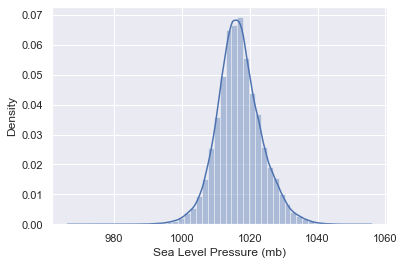

In [57]:
# normally distributed. Fill nan values with average
sns.distplot(data['Sea Level Pressure (mb)'])

In [58]:
print(data['Sea Level Pressure (mb)'].mean())
print(data['Sea Level Pressure (mb)'].median())

1016.8377960532281
1016.5


In [59]:
data['Sea Level Pressure (mb)'] = data['Sea Level Pressure (mb)'].fillna(data['Sea Level Pressure (mb)'].mean())

In [60]:
data.isnull().sum()

City                               0
State                              0
Wind Direction                     0
Latitude                           0
Cloud Cover (%)                    0
Minimum Temperature (degF)         0
Date time                          0
Precipitation (in)                 0
Dew Point (degF)                   0
Relative Humidity (%)              0
Precipitation Cover (%)            0
Longitude                          0
Temperature (degF)                 0
Maximum Temperature (degF)         0
Visibility (mi)                    0
Wind Speed (mph)                   0
Weather Type                  214362
Snow Depth (in)                    0
Sea Level Pressure (mb)            0
Snow (in)                          0
Wind Gust (mph)                    0
Conditions                         0
dtype: int64

In [61]:
len(data['Weather Type'].unique())

5835

In [62]:
data = data.drop(columns=['Weather Type'])

In [63]:
data.isnull().sum()

City                          0
State                         0
Wind Direction                0
Latitude                      0
Cloud Cover (%)               0
Minimum Temperature (degF)    0
Date time                     0
Precipitation (in)            0
Dew Point (degF)              0
Relative Humidity (%)         0
Precipitation Cover (%)       0
Longitude                     0
Temperature (degF)            0
Maximum Temperature (degF)    0
Visibility (mi)               0
Wind Speed (mph)              0
Snow Depth (in)               0
Sea Level Pressure (mb)       0
Snow (in)                     0
Wind Gust (mph)               0
Conditions                    0
dtype: int64

In [64]:
data[data['City'] == 'Sacramento']['Date time']

464672   2017-01-01
464673   2017-01-02
464674   2017-01-03
464675   2017-01-04
464676   2017-01-05
            ...    
466203   2021-03-12
466204   2021-03-13
466205   2021-03-14
466206   2021-03-15
466207   2021-03-16
Name: Date time, Length: 1536, dtype: datetime64[ns]

In [65]:
data['Date time'].value_counts().sort_values(ascending=True)[:10]

2021-03-17     61
2021-02-20    396
2017-11-26    397
2018-01-16    397
2020-09-13    397
2019-07-11    397
2018-05-07    397
2017-03-03    397
2021-01-02    397
2017-03-17    397
Name: Date time, dtype: int64

In [66]:
# remove 2021-03-17 (only for a few cities)
data = data[~(data['Date time'] == '2021-03-17')]

In [67]:
data['Date time'].value_counts()

2020-02-04    397
2020-11-27    397
2017-12-25    397
2020-05-03    397
2018-09-18    397
             ... 
2020-08-19    397
2017-11-26    397
2019-01-30    397
2018-07-17    397
2021-02-20    396
Name: Date time, Length: 1536, dtype: int64

## Encoding and Scaling categorical features

In [68]:
data.describe(exclude='number')

C:\Users\tigju\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,City,State,Date time,Conditions
count,609791,609791,609791,609791
unique,376,49,1536,9
top,Springfield,CA,2020-02-04 00:00:00,Clear
freq,6144,61440,397,206892
first,NaN,NaN,2017-01-01 00:00:00,NaN
last,NaN,NaN,2021-03-16 00:00:00,NaN


In [69]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int64)

In [70]:
encoded_city = enc.fit_transform(data['City'].values.reshape(-1,1))
encoded_state = enc.fit_transform(data['State'].values.reshape(-1,1))
encoded_conditions = enc.fit_transform(data['Conditions'].values.reshape(-1,1))

In [71]:
encoded_conditions

array([[0],
       [1],
       [4],
       ...,
       [0],
       [2],
       [0]], dtype=int64)

In [72]:
# make a copy of data and encode categorical features + date feature, scale date deature
new_df = data.copy()
new_df['City'] = encoded_city
new_df['State'] = encoded_state
new_df['Conditions'] = encoded_conditions

# For linear regression convert date to ordinal
import datetime as dt
new_df['Date time'] = new_df['Date time'].map(dt.datetime.toordinal)

# scale time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(new_df['Date time'].values.reshape(-1, 1))
new_df['Date time'] = scaled

## Logistic regression is a base line (per each city)

In [73]:
new_df.head()

,City,State,Wind Direction,Latitude,Cloud Cover (%),Minimum Temperature (degF),Date time,Precipitation (in),Dew Point (degF),Relative Humidity (%),Precipitation Cover (%),Longitude,Temperature (degF),Maximum Temperature (degF),Visibility (mi),Wind Speed (mph),Snow Depth (in),Sea Level Pressure (mb),Snow (in),Wind Gust (mph),Conditions
1,0,34,180.46,41.08431,10.3,23.2,-1.730923,0.00,23.3,66.47,0.00,-81.51431,33.7,42.2,9.5,10.5,0.41,1020.8,0.00,26.420465,0
2,0,34,84.79,41.08431,82.1,33.0,-1.728668,0.00,37.6,85.22,16.67,-81.51431,41.8,47.8,3.4,7.3,0.00,1020.3,0.00,26.420465,1
3,0,34,179.42,41.08431,90.3,42.0,-1.726413,0.37,43.6,90.06,66.67,-81.51431,46.3,48.8,5.0,13.1,0.00,1005.3,0.00,29.800000,4
4,0,34,275.25,41.08431,95.8,20.8,-1.724158,0.02,20.8,68.33,20.83,-81.51431,30.2,43.0,8.6,31.5,0.00,1008.3,0.00,39.600000,4
5,0,34,257.54,41.08431,74.0,12.6,-1.721902,0.02,10.7,71.11,37.50,-81.51431,18.5,20.8,5.2,15.1,1.02,1015.0,1.02,24.200000,8


In [74]:
# group per city
grouped = new_df.groupby(['City','State'], as_index=False)

In [75]:
len(grouped.groups)

397

In [76]:
# train test split
from sklearn.model_selection import train_test_split
train = pd.DataFrame()
test = pd.DataFrame()

# split per each group where 20% of group records goes to test
for city in grouped.groups:
    group = grouped.get_group(city)
    tr, ts = train_test_split(group, test_size=0.2)
    train = pd.concat([train, tr])
    test = pd.concat([test, ts])
    
train.shape, test.shape

((487516, 21), (122275, 21))

In [77]:
# group within train and test datasets
train_grouped = train.groupby(['City','State'], as_index=False)
test_grouped = test.groupby(['City','State'], as_index=False)

### Train Logistic Regression Model

In [78]:
from sklearn.linear_model import LogisticRegression

In [82]:
# create model
logreg = LogisticRegression(max_iter=2000, n_jobs=-1, multi_class='multinomial')

# create additional datasets to compare accuracy
train_predictions = pd.DataFrame()
train_accuracy = pd.DataFrame()
test_predictions = pd.DataFrame()
test_accuracy = pd.DataFrame()

# loop though each city group
for city in train_grouped.groups:
    train_group = train_grouped.get_group(city)
    
    #split into X and y features for train set
    X_train = train_group.drop(columns=['Conditions'])
    y_train = train_group['Conditions']
    
    #fit model
    logreg.fit(X_train, y_train)
    
    # for accuracy column to see per each city
    city_name = train_group['City'].unique()[0]
    state_name = train_group['State'].unique()[0]
    
    # concatenate score for train set per each city
    train_score = logreg.score(X_train, y_train)
    train_score = pd.DataFrame(data=[[city_name, state_name, train_score]], columns=['City', 'State', 'Score'])
    train_accuracy = pd.concat([train_accuracy, train_score])
    
    # save predicted values
    train_predict = logreg.predict(X_train)
    
    # concatenate predicted results per each city group
    train_fr = pd.DataFrame(data=train_predict, index=X_train.index, columns=['Predictions'])
    train_merged = pd.merge(X_train, train_fr, left_index=True, right_index=True)
    train_predictions = pd.concat([train_predictions, train_merged])
    
    
    #split into X and y features for test set
    test_group = test_grouped.get_group(city)
    X_test = test_group.drop(columns=['Conditions'])
    y_test = test_group['Conditions']
    
    # concatenate score for test set per each city
    test_score = logreg.score(X_test, y_test)
    test_score = pd.DataFrame(data=[[city_name, state_name, test_score]], columns=['City', 'State', 'Score'])
    test_accuracy = pd.concat([test_accuracy, test_score])
    
    # save predicted test values
    test_predict = logreg.predict(X_test)
    
    # concatenate predicted results per each city group
    test_fr = pd.DataFrame(data=test_predict, index=X_test.index, columns=['Predictions'])
    test_merged = pd.merge(X_test, test_fr, left_index=True, right_index=True)
    test_predictions = pd.concat([test_predictions, test_merged])

In [83]:
train_predictions.shape

(487516, 21)

In [85]:
test_predictions.shape

(122275, 21)

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test['Conditions'], test_predictions['Predictions'])

In [87]:
cm

array([[40819,     0,   196,   404,     0,     8,   203,     0,     5],
       [    0,  4398,   104,     0,   396,     4,     0,   166,     2],
       [  247,   112, 27565,    10,     8,  1112,     8,     4,   309],
       [  715,     0,    10,  3898,     0,    85,    64,     0,     3],
       [    0,   514,     8,     0, 10520,   151,     0,   378,     5],
       [    3,    11,  1583,    85,   162, 19243,     1,    15,   341],
       [  585,     0,     3,    45,     0,     1,   426,     0,    22],
       [    0,   406,     5,     0,   381,     0,     0,  2724,    50],
       [    9,     1,   799,     1,     5,   317,     5,    60,  2555]],
      dtype=int64)

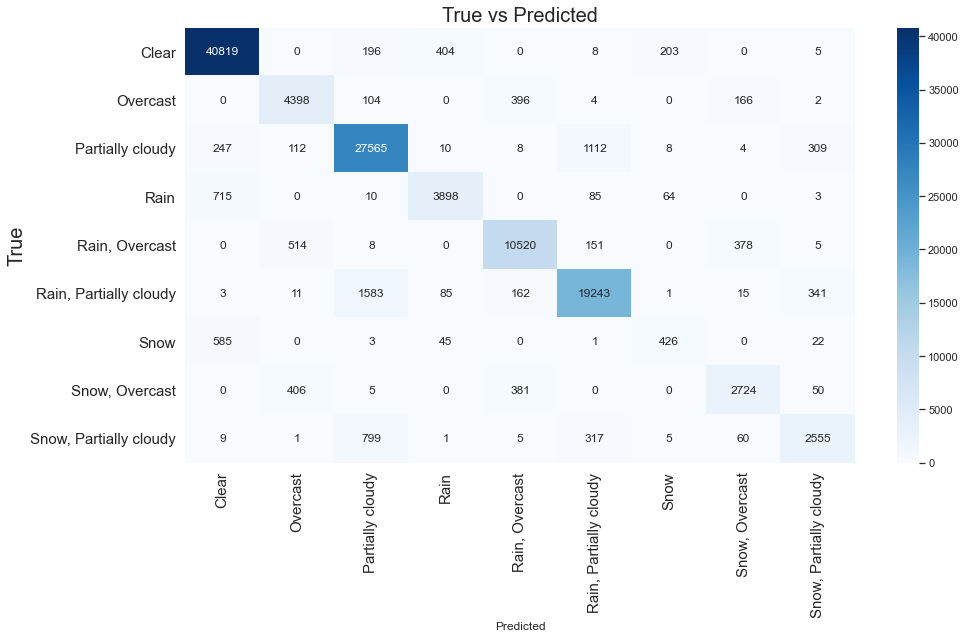

In [88]:
# Plot to see predicted results

ticks = enc.categories_[0]
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=ticks, yticklabels=ticks)
plt.tick_params(labelsize=15)
plt.xlabel('Predicted')
plt.ylabel('True', fontsize=20)
plt.title('True vs Predicted', fontsize=20)
plt.show()

In [89]:
# Check accuracy score
print("Train accuracy: ", train_accuracy['Score'].mean())
print("Test accuracy: ", test_accuracy['Score'].mean())

Train accuracy:  0.9447525824793442
Test accuracy:  0.9171787688513292


## My base line with multiple logistic regression is 91%. For some cities it predicted better for some not. 